## <center> Akhilesh Bhaugeerutty & Magib Seck & Mouad Tai <b/>
### <center> Exercices Python

#### Exercices à rendre pour le 02/03: - Partie II
Exercice 2 page 101 & Exercice 4 page 103.

#### Exercice 1:

Après avoir travaillé sur des problèmes de classification, nous nous intéressons à présent sur des Régressions. Nous utiliserons le même jeu de données utilisé lors des séances précedentes, la variable cible à prédire étant 'charges', soit le prix à payer. 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

insurance = pd.read_pickle("Downloads/insurance.pkl")
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Après avoir divisé le dataframe en échantillons test/apprentissage, nous allons lancer une Régression du Gradient Boosting: 

In [4]:
from sklearn.model_selection import train_test_split
variables = [x for x in insurance.columns if x!='charges'] 
X = insurance[variables] 
Y = insurance['charges']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=1998)

In [6]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=390,max_depth=4,
                                learning_rate=0.01,random_state=2018) 
gbr.fit(X_train,Y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=390,
                          n_iter_no_change=None, presort='auto',
                          random_state=2018, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Testons sa précision: 

In [8]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 
print('erreur absolue =', mean_absolute_error(Y_test,gbr.predict(X_test)))
print('R2 =', r2_score(Y_test,gbr.predict(X_test)))

erreur absolue = 2440.0302787873075
R2 = 0.8700901533405005


Le $R^2$ est plutôt correct. 

A présent, essayons de tracer les scores $R^2$ des ensembles Apprentissage & Test en fonction de la profonderu maximale de l'arbre: 

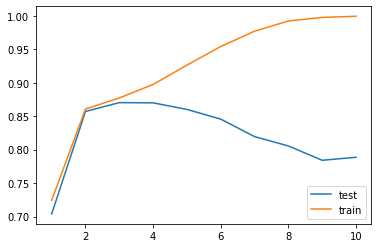

In [16]:
data = []
for i in range(1,11): 
    gbr = GradientBoostingRegressor(learning_rate=0.01, n_estimators=400,max_depth=i, max_features=X_train.shape[1],random_state=2018) 
    gbr.fit(X_train,Y_train)
    a = [i,r2_score(Y_train,gbr.predict(X_train)),r2_score(Y_test,gbr.predict(X_test))]
    data.append(a)

x = [x[0] for x in data] 
train = [x[1] for x in data] 
test = [x[2] for x in data] 

plt.plot(x,test,label="test") 
plt.plot(x,train,label="train")
plt.legend(loc=4) 


Pour une profondeur entre 1 et 2 noeuds, le scores $R^2$ se suivent. On atteint le plus haut score $R^2$ pour l’ensemble de test pour une profondeur de 4 noeuds. Ensuite, le score $R^2$ diminue pour l’ensemble de test, mais augmente pour l’ensemble d’entraînement. A partir d'une profondeur de 8 noeuds, on est dans un cas d'overfitting, il y a sur-apprentissage. 


#### Exercice 2:

Bien que cet exercice soit court, il prend du temps à s'éxécuter. Nous allons utiliser une Validation Croisée afin de trouver les meilleurs paramètres pour une Régression par Forêt Aléatoire. Nous allons nous essayer de maximiser le $R^2$. Les données n'ayant pas changé, on peut immédiatement lancer la Cross Validation: 

In [17]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor 

rdfr = RandomForestRegressor(random_state=2018)
parameters = {'n_estimators':list(range(20,80)),'max_depth':list(range(3,15)),
              'max_features':list(range(5,12))}


rf = GridSearchCV(estimator=rdfr,param_grid=parameters,
                   scoring='r2')

rf.fit(X_train,Y_train)

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=2018,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 

In [20]:
print(rf.best_params_)
print(rf.best_score_)

{'max_depth': 4, 'max_features': 10, 'n_estimators': 75}
0.8516112789794587


On voit ici que la meilleure profondeur est 4 noeuds, qui nous amène à un $ R^2$de 0.85, validant ainsi les résultats obtenus dans l'exercice précédent. 